# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Importing necessary libraries and data

In [66]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.model_selection import GridSearchCV

In [67]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [68]:
visa = pd.read_csv('/content/drive/MyDrive/Python Course/EasyVisa.csv')

In [69]:
type(visa)

pandas.core.frame.DataFrame

# Data Overview

- Observations
- Sanity checks

In [70]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [71]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Observations:
* The case_id column containes unique values.
* case_status is either certified or denied

In [72]:
visa.shape

(25480, 12)

Observations:
* There are 25,480 rows and 12 columns in our data

In [73]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observations:
* There are 3 numeric columns and 9 object columns in our dataset

In [74]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Observations:
* The yr_of_estab ranges from 1800 to 2016
* The minimum no_of_employees is -23, this seems like the data is incorrect here.

**Duplicate values check**

In [75]:
visa.duplicated().sum()

0

* There are 0 duplicate values in our set

**Missing values check**

In [76]:
visa.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing values

In [77]:
(visa['no_of_employees'] < 0).sum()

33

* There are 33 negative values in the no_of_employees column

In [78]:
visa["no_of_employees"] = (visa["no_of_employees"].abs())

* We took the absolute value of the values in the no_of_employees column to fix the mistakes of the negative amount of employees.

In [79]:
(visa['no_of_employees'] < 0).sum()

0

* There are now no negative values in the no_of_employees column

**Unique Value Check**

In [80]:
cat_col = list(visa.select_dtypes("object").columns)

for column in cat_col:
    print(visa[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [82]:
visa.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [85]:
visa["case_id"].nunique()

25480

The case_id column is all unique values, so we will drop this column as it does not help our case.

**Dropping Unique Values**

In [84]:
data = visa.drop(["case_id"], axis=1)

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

##Univariate Analysis

In [86]:
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [87]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

### Number of employees

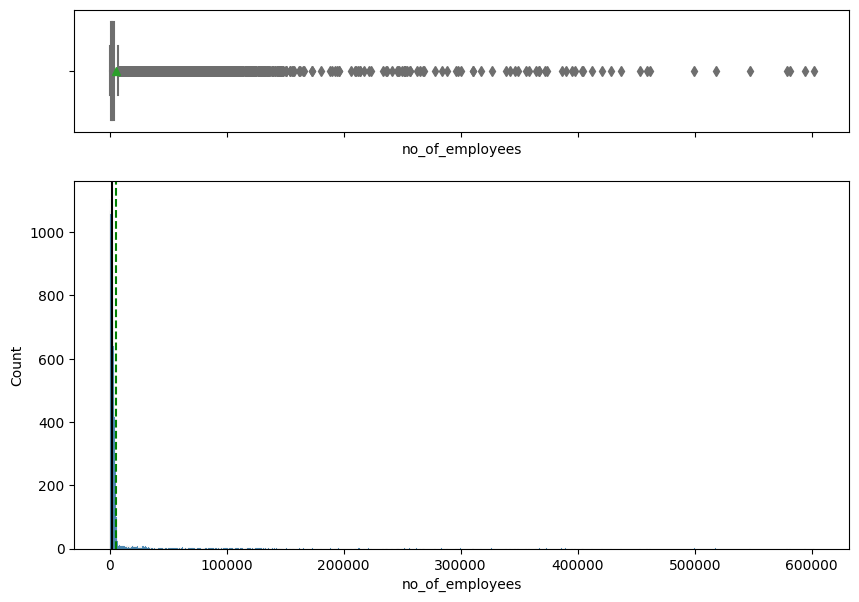

In [89]:
histogram_boxplot(data,'no_of_employees')

Observations:
* There are very large outliers causing the data to be spread out and hard to read.

###Prevailing wage

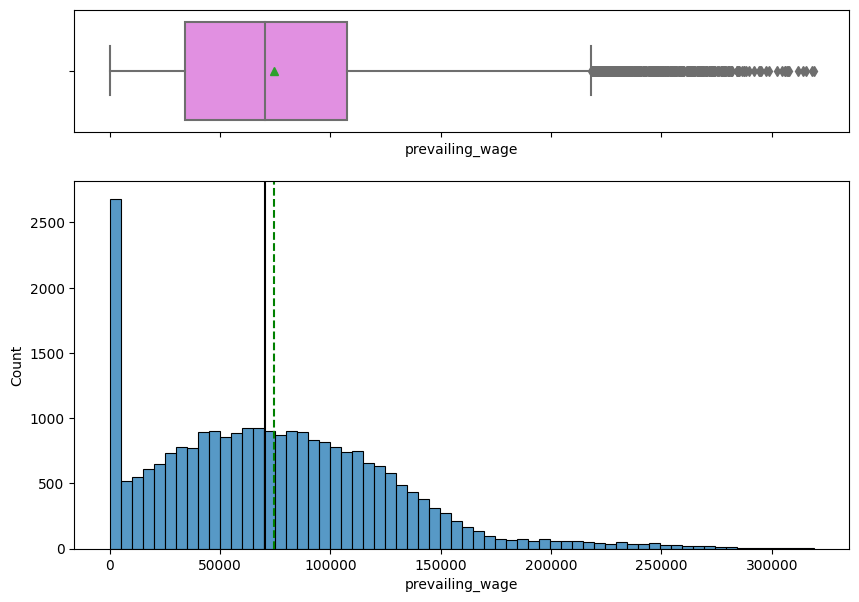

In [90]:
histogram_boxplot(data, "prevailing_wage")

Observations:
* The mean is larger than the median in the prevailing wage column.
* There are quite a few outliers

In [94]:
data.loc[data["prevailing_wage"]<100].value_counts()

continent      education_of_employee  has_job_experience  requires_job_training  no_of_employees  yr_of_estab  region_of_employment  prevailing_wage  unit_of_wage  full_time_position  case_status
Africa         Bachelor's             N                   N                      451              2000         South                 66.1509          Hour          Y                   Certified      1
                                                                                 2006             1959         West                  44.8222          Hour          Y                   Denied         1
North America  Bachelor's             N                   N                      1409             1861         South                 89.4706          Hour          Y                   Certified      1
                                                                                 1599             1993         Northeast             93.7639          Hour          Y                   Certified      1


In [93]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

Observations:
* There are 176 rows where the prevailing_wage is less than 100.

### Education of employee

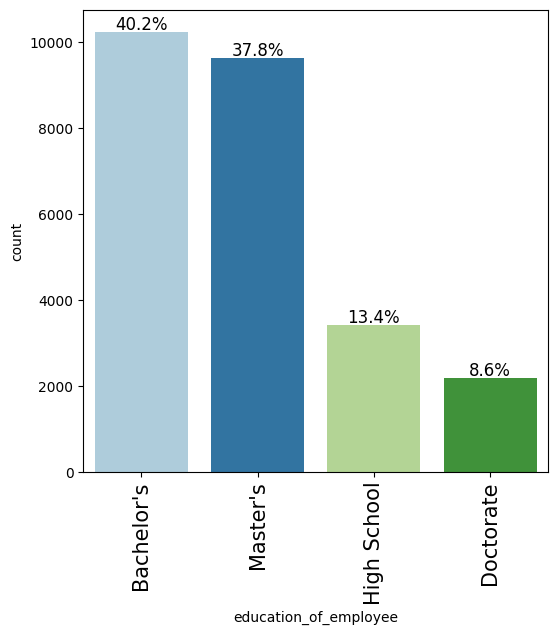

In [97]:
labeled_barplot(data, 'education_of_employee', perc=True)

Observations:
* Only 13.4% of the applicants just have a High school diploma, the rest have a college degree.
* Most of the visa applicants are very educated

###Continent

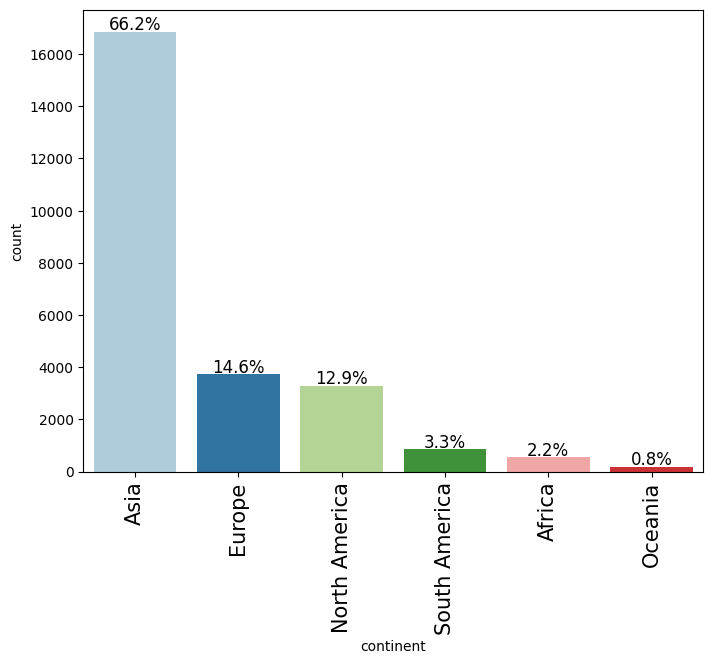

In [98]:
labeled_barplot(data, 'continent', perc=True)

Observations:
* A majority of the applicants are employed in Asia
* 12.9% of the applicants are employed in North America

###Job experience

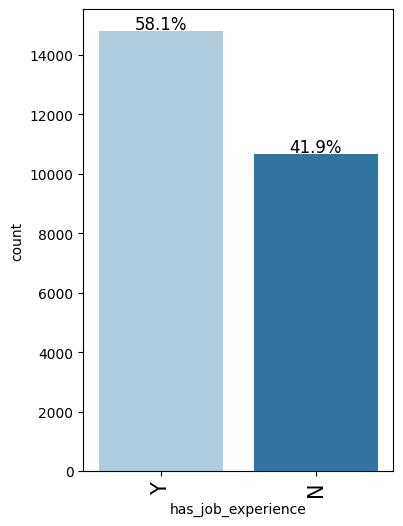

In [99]:
labeled_barplot(data, 'has_job_experience', perc=True)

Observations:
* More than half the applicants have job experience, but many do not

###Job training

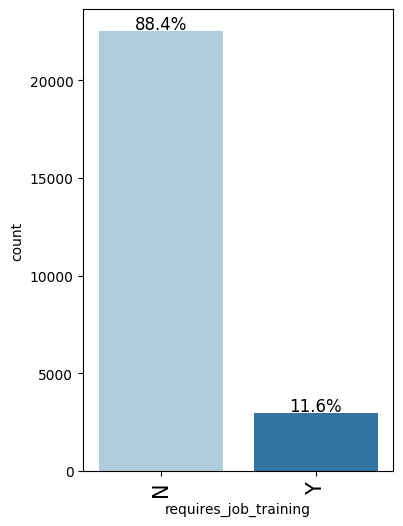

In [100]:
labeled_barplot(data, 'requires_job_training', perc=True)

Observations:
* 88.4% of the applicants would not require job training

###Region of employment

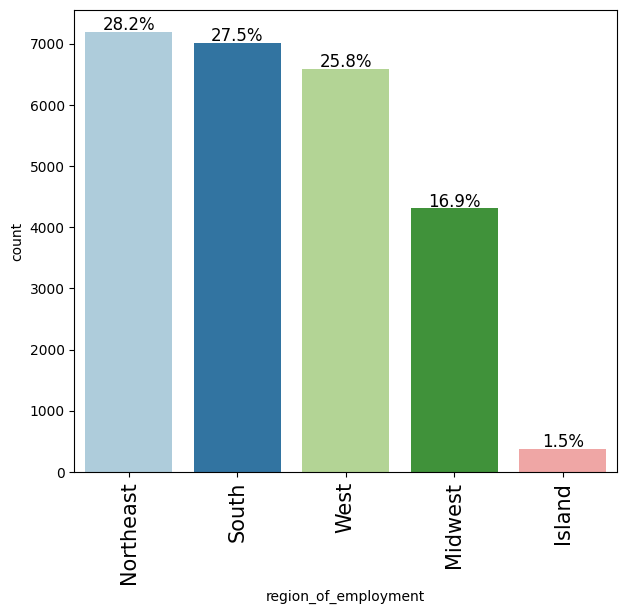

In [101]:
labeled_barplot(data, 'region_of_employment', perc=True)

Observations:
* A majority of the employers where applicants would work are in the Northeast, South, and West. These are areas with the largest cities and companies.

###Unit of wage

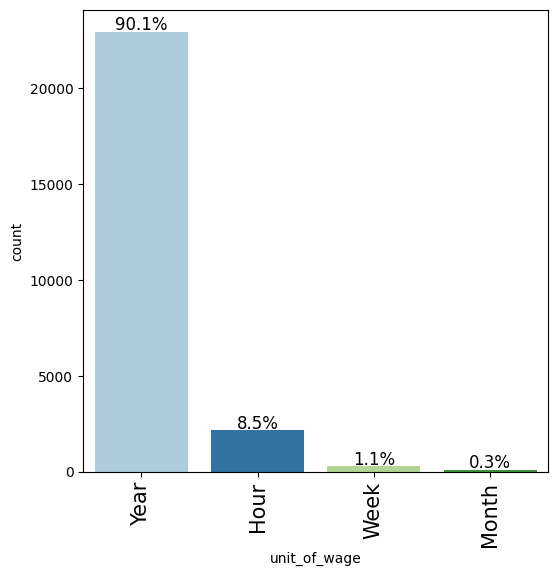

In [102]:
labeled_barplot(data, 'unit_of_wage', perc=True)

Observations:
* 90.1% would receive a yearly salary

###Case Status

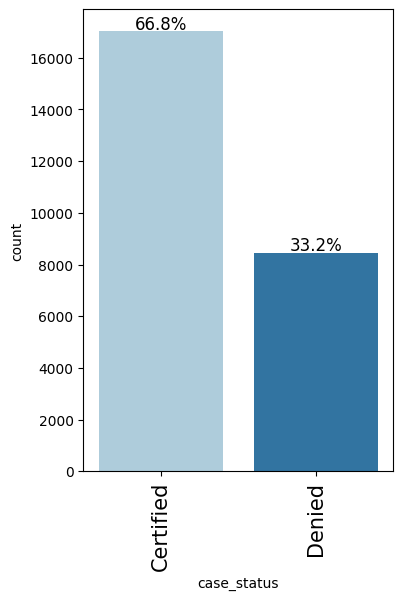

In [103]:
labeled_barplot(data, 'case_status', perc=True)

Observations:
* 66.8% of applicants are Certified and only 33.2% are Denied

In [109]:
data["case_status"] = data["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)

* Case Status 1: Certified, 0: Denied

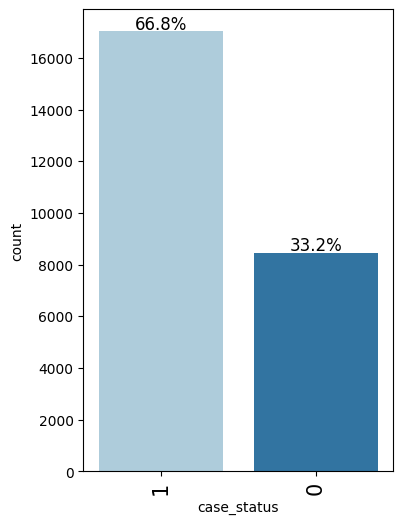

In [110]:
labeled_barplot(data, 'case_status', perc=True)

##Bivariate Analysis

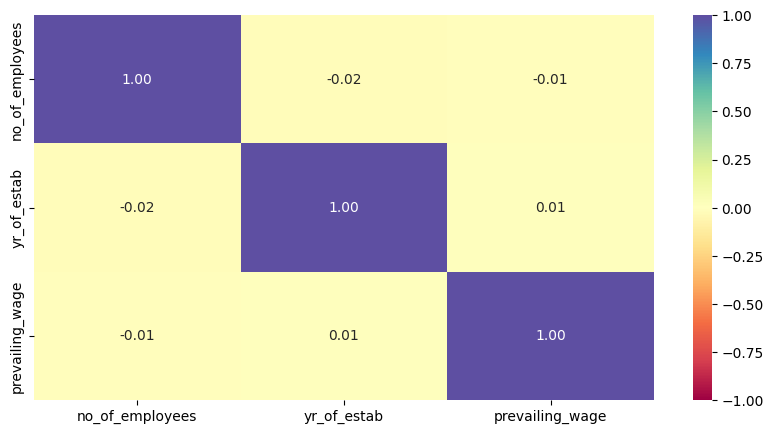

In [104]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:
* These variables are not correlated

In [105]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [106]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

###Education of employee vs Case Status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


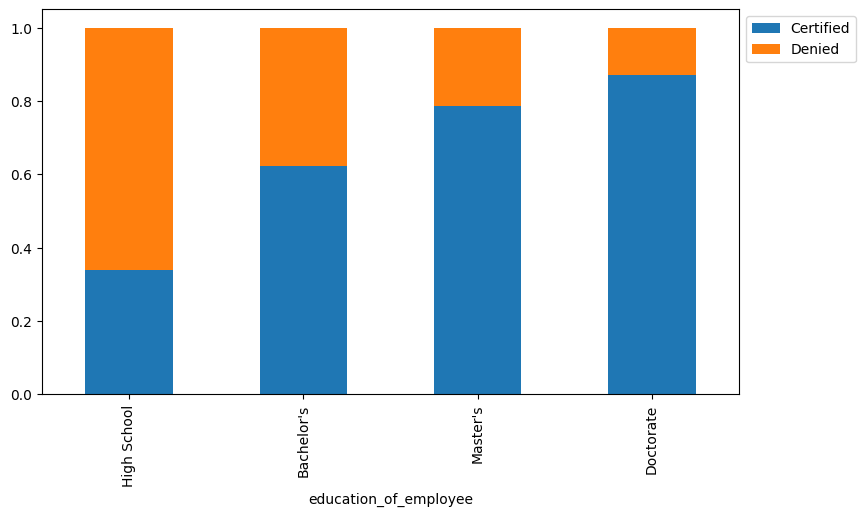

In [107]:
stacked_barplot(data, "education_of_employee", "case_status")

Observations:
* Applicants with a Doctorate degree are less likely to get Denied
* Applicants with only a High School degree or more likely to get Denied and less likely to get Certified
* This seems to be a big variable in whether someone gets Certified or Denied

###Education of employee vs Region of employment

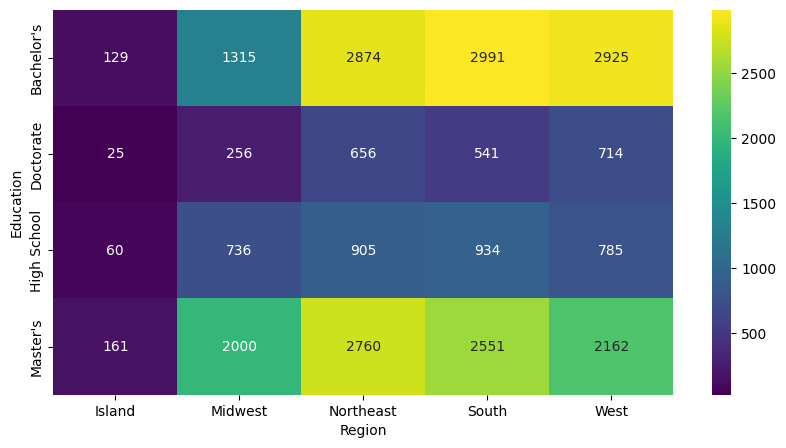

In [108]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis"
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observations:
* Those with Doctorate are more likely to be employed in the West
* Those with a Masters are more likley to be employed in the Northeast

###Region of employment vs Case Status

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


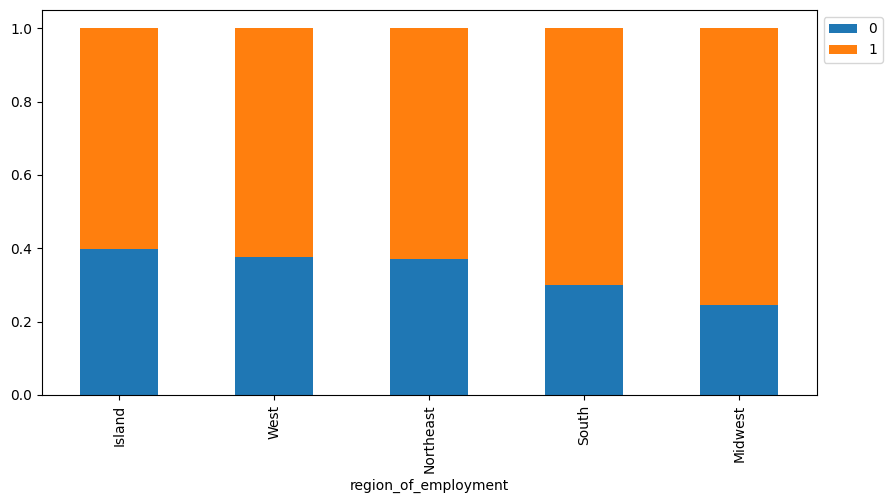

In [111]:
stacked_barplot(data, "region_of_employment", "case_status")

###Continent vs Case Status

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


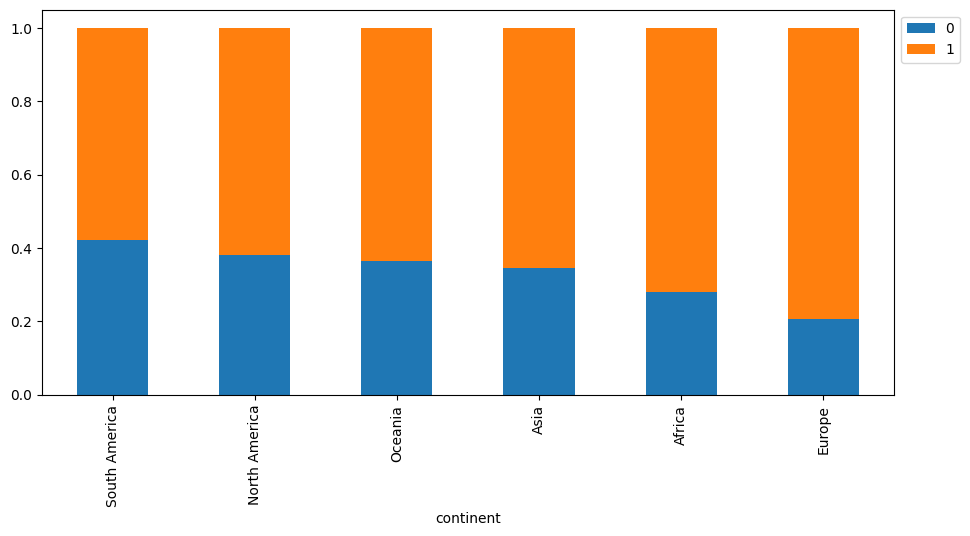

In [112]:
stacked_barplot(data, "continent", "case_status")

Observations:
* Applicants from Europe are the most likley to be Certified

###Job experience vs Case Status

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


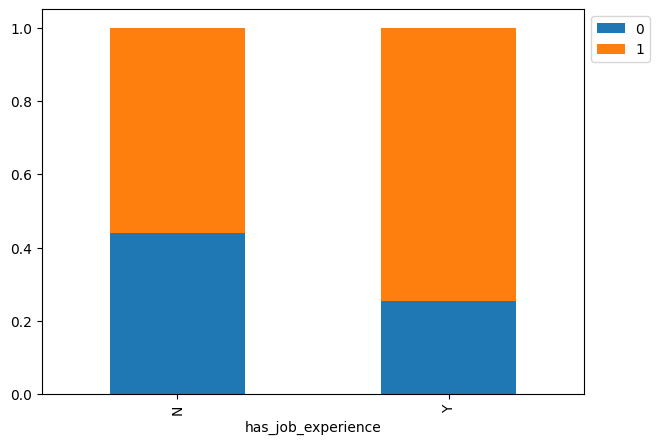

In [113]:
stacked_barplot(data, "has_job_experience", "case_status")

Observations:
* Applicants with job experience are more likely to be Certified

###Job experience vs Requires job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


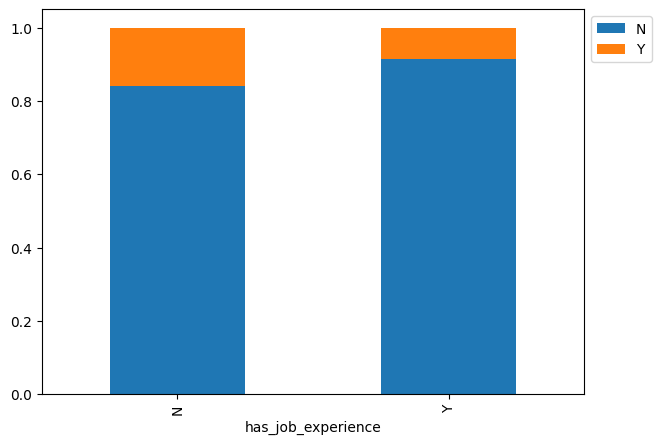

In [114]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

###Distribution of prevailing wage vs Case Status

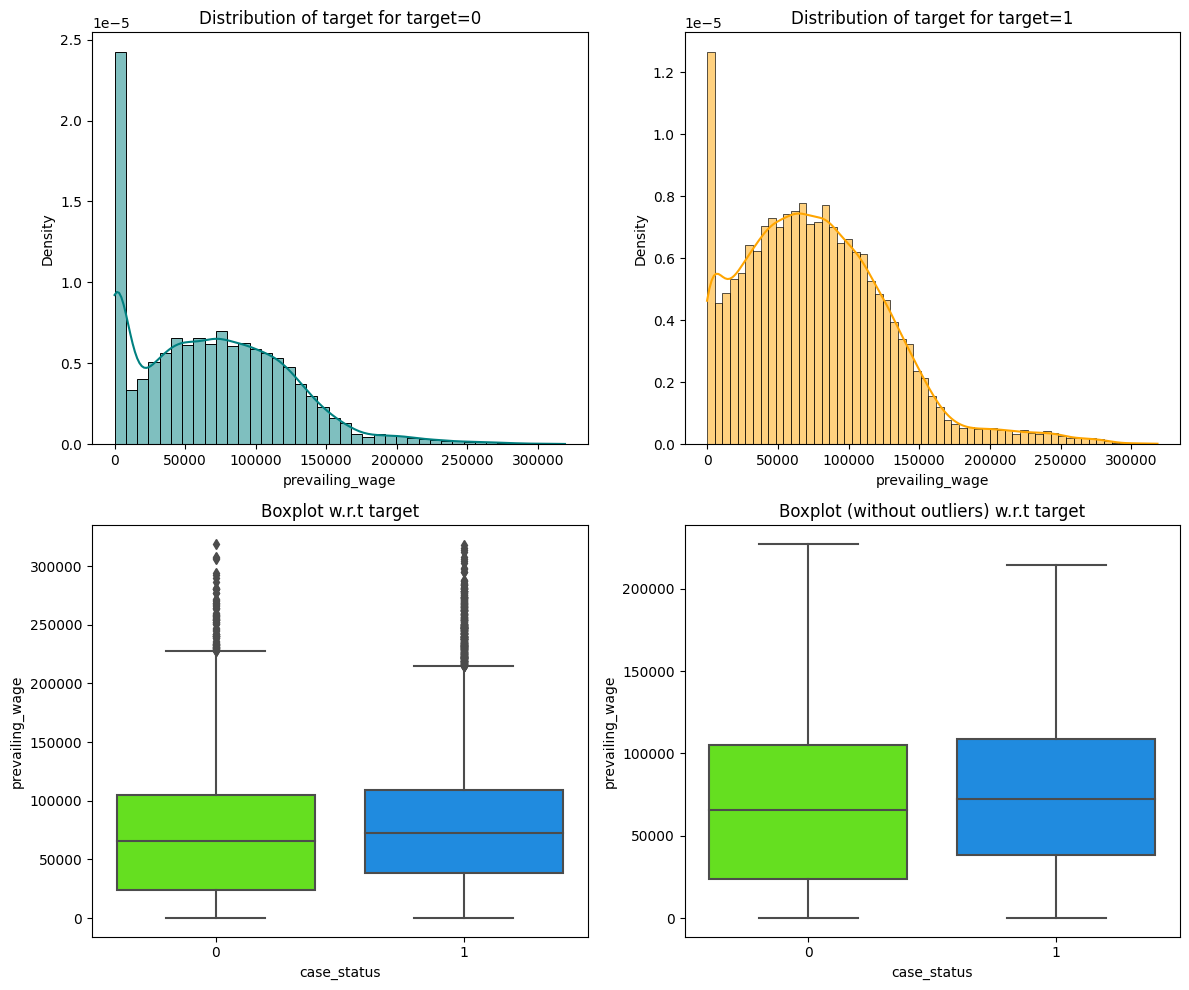

In [115]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")


Observations:
* Those that are certified have a higher prevailing wage

###Region of employement vs Prevailing wage

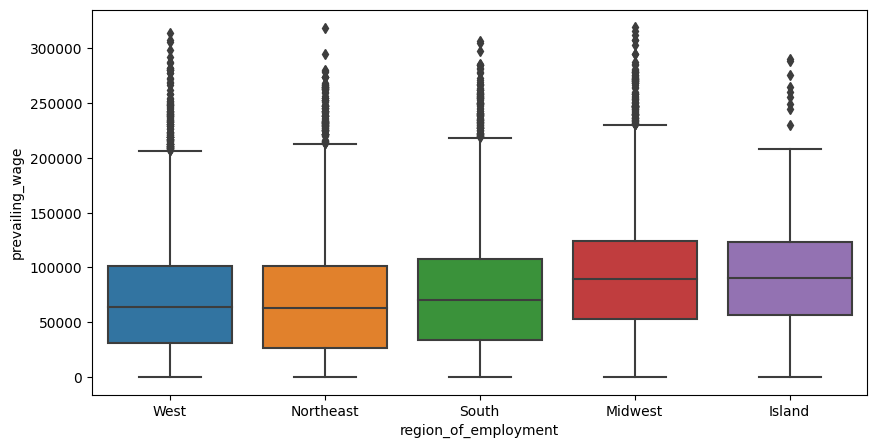

In [118]:
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="region_of_employment", y="prevailing_wage")
plt.show()

Observations:
* Prevailing wage is higher in the midwest and islands

###Unit of wage vs Case Status

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


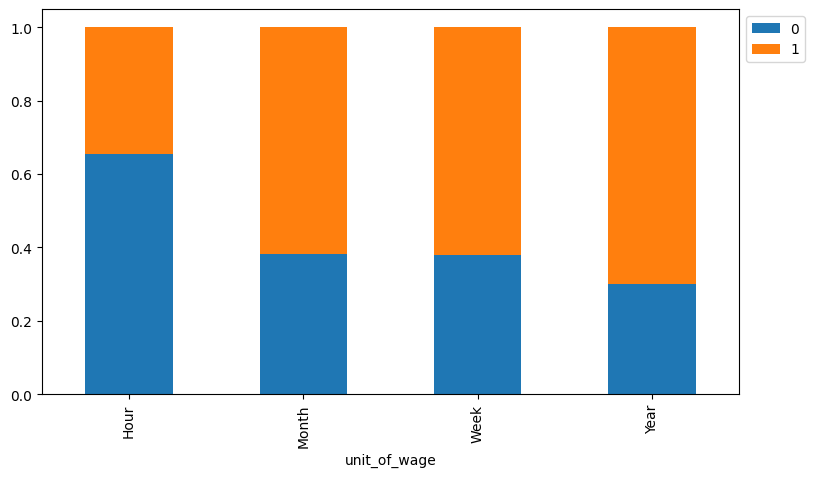

In [119]:
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:
* Hourly wages are less likely to be Certified
* Yearly wages are more likely to be certified

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Outlier Check**

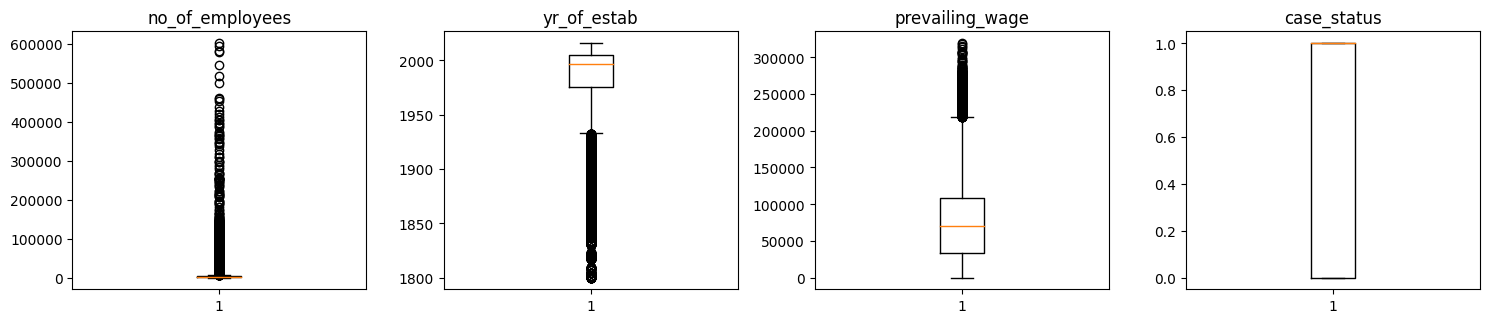

In [120]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* There are many outliers in number of employees and year of establishment, however these are important to these data columns

**Data preparation for modeling**

In [123]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [124]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


# EDA

- It is a good idea to explore the data once again after manipulating it.

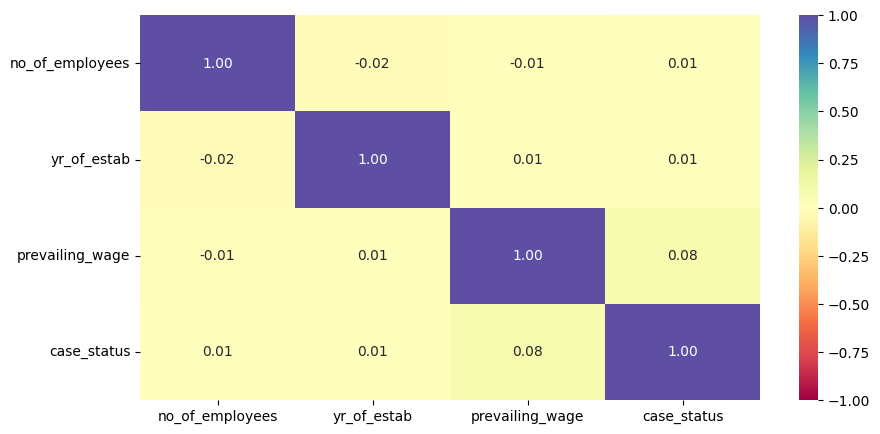

In [125]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#Model evaluation

**Model can make wrong predictions:**
1. The model predicts that the visa application will get certified, but it should get denied.
2. The model predicts that the visa application will get denied when it really should get certified.

* Both cases are important:
1. If a visa is certified when it should have been denied a wrong employee will get the job
2. If a visa is denied when it should have been certified the U.S will lose a an employee suitable for the position.

**How to reduce the losses**
* We will use the F1-Score for evaluation of the model. The greater the F1-Score the greater tha chances of minimizing the false negatives and false positives. We will use balanced class weights so the model focuses on both classes equally.

In [126]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [127]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree- Model building and tuning

###Decision Tree Model

In [128]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on train and test set**

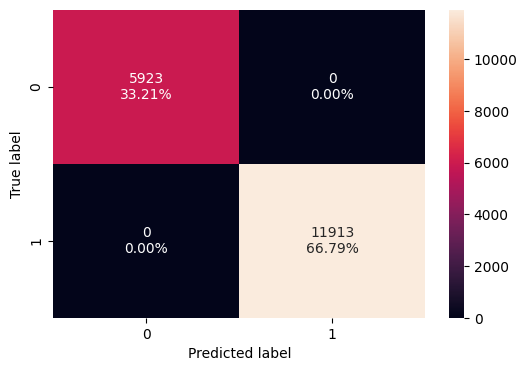

In [129]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [130]:
decision_tree_perf_train = model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",decision_tree_perf_train)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


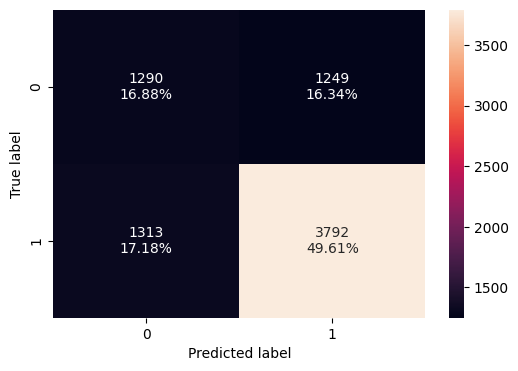

In [131]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [132]:
decision_tree_perf_test = model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",decision_tree_perf_test)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


Observations:
* The decision tree model is overfitting

###Decision Tree: Hyperparameter Tuning

In [133]:
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_estimator = grid_obj.best_estimator_

dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

**Training performance**

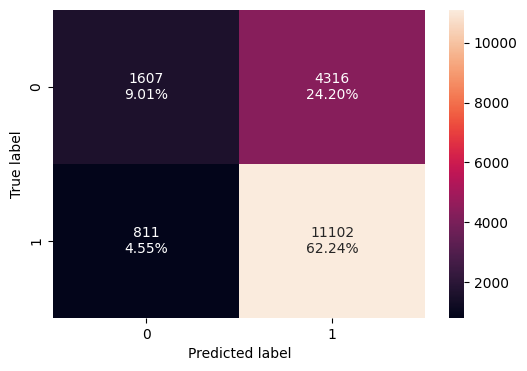

In [134]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [135]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


**Test performance**

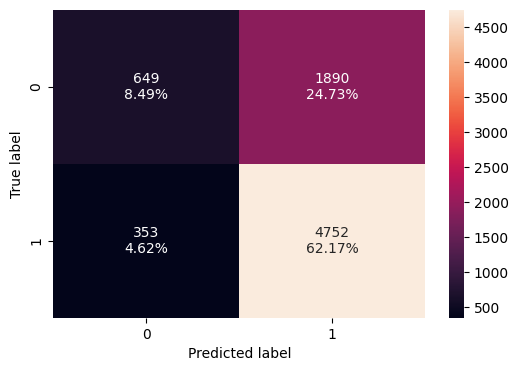

In [136]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [137]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Test performance \n",dtree_estimator_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


Observations:
* The f1-score on the test set performed worse than on the training set.

In [145]:
print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
education_of_employee_High School  1.0
no_of_employees                    0.0
has_job_experience_Y               0.0
unit_of_wage_Year                  0.0
unit_of_wage_Week                  0.0
unit_of_wage_Month                 0.0
region_of_employment_West          0.0
region_of_employment_South         0.0
region_of_employment_Northeast     0.0
region_of_employment_Midwest       0.0
requires_job_training_Y            0.0
education_of_employee_Master's     0.0
yr_of_estab                        0.0
education_of_employee_Doctorate    0.0
continent_South America            0.0
continent_Oceania                  0.0
continent_North America            0.0
continent_Europe                   0.0
continent_Asia                     0.0
prevailing_wage                    0.0
full_time_position_Y               0.0


The Tuned Decision Tree is playing all importance on education of the employee being in highschool for its indiciation of an application being Certified or Denied

## Bagging- Model building and tuning

###Bagging Classifier

In [138]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

**Checking model performance on training and test set**

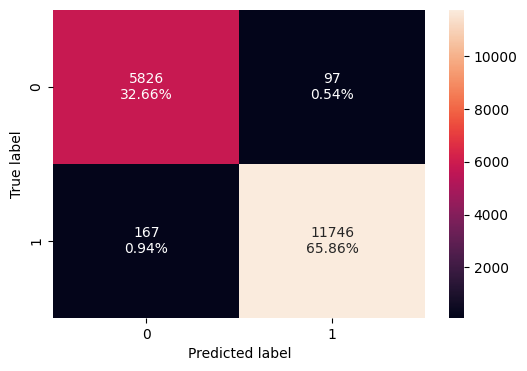

In [139]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [140]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


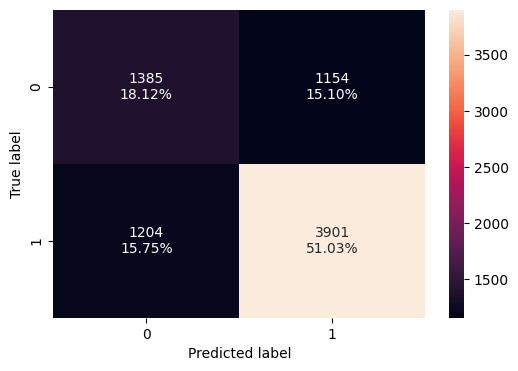

In [141]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [143]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
print("Testing performance \n",bagging_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* This model is overfitting as the training set performed way better than the test set. The f1-score on the test set is worse than the tuned decision tree model.

###Bagging Classifier- Hyperparameter Tuning

In [144]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

**Model performance on training set**

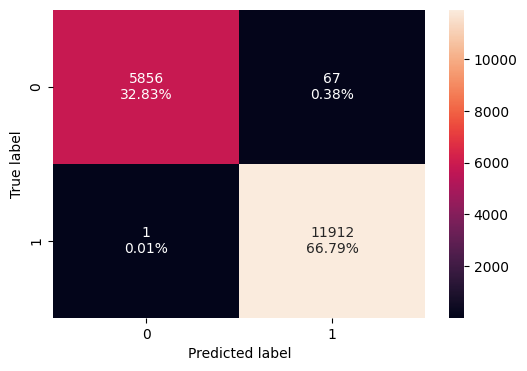

In [146]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [147]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training performance \n",bagging_estimator_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154


**Model performance on test set**

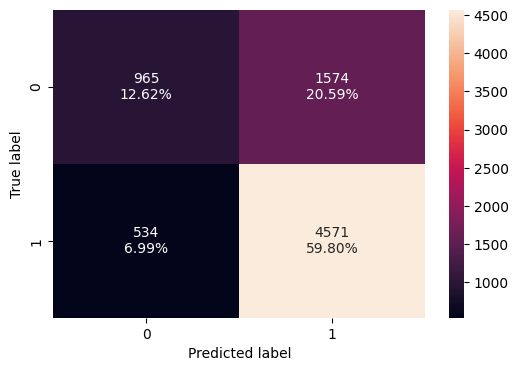

In [148]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [149]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Test performance \n",bagging_estimator_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622


Observations:
* The training set is way outperforming the test set showing some overfitting
* The f1-score is higher on the Tuned Bagging Classifier than on the Tuned Decision Tree and Bagging Classifier models.

##Random Forest

###Random Forest

In [151]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight= "balanced")
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

**Model performance on training set**

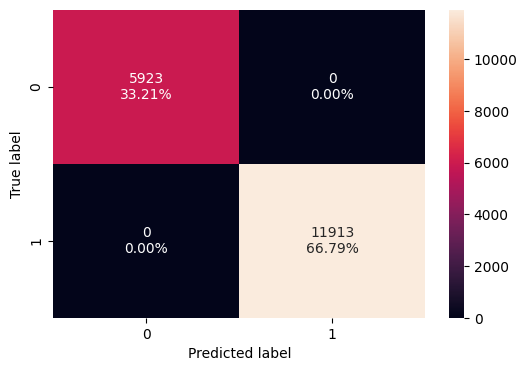

In [152]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [153]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


**Model performance on test set**

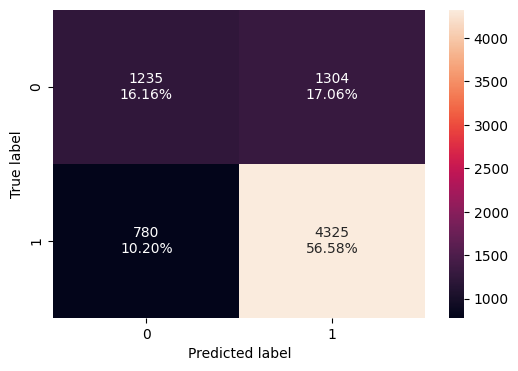

In [154]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [155]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Test performance \n",rf_estimator_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851


* The Random Forest model is overfitting the data

###Random Forest- Tuned

In [156]:
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

**Training performance**

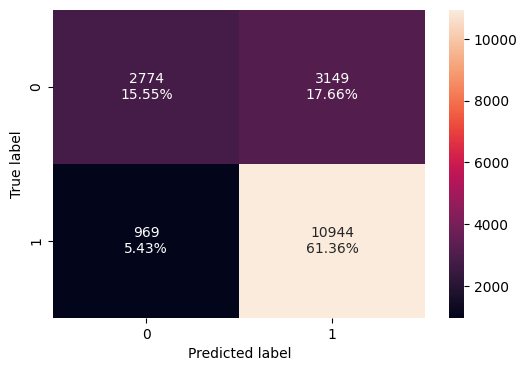

In [157]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [158]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


**Test performance**

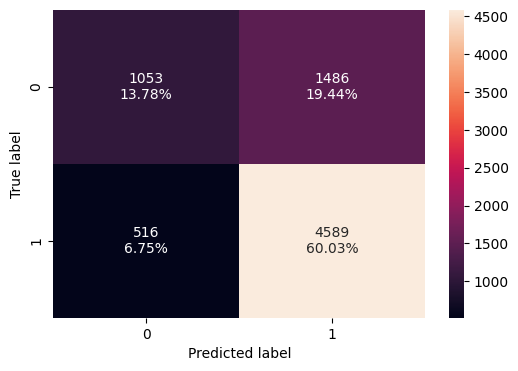

In [159]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [160]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Test performance \n",rf_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


* The Tuned Random Forest is performing much better than the non-tuned Random Forest model. The F1-score is the best so far out of all our models.

In [161]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.234452
prevailing_wage                    0.150029
has_job_experience_Y               0.118696
education_of_employee_Master's     0.085766
no_of_employees                    0.067280
yr_of_estab                        0.058228
education_of_employee_Doctorate    0.055792
unit_of_wage_Year                  0.046702
continent_Europe                   0.041715
region_of_employment_Midwest       0.024973
continent_Asia                     0.016195
region_of_employment_West          0.015561
full_time_position_Y               0.014733
region_of_employment_South         0.014553
continent_North America            0.013878
requires_job_training_Y            0.012244
region_of_employment_Northeast     0.010722
continent_South America            0.008815
unit_of_wage_Week                  0.004329
continent_Oceania                  0.003455
unit_of_wage_Month                 0.001881


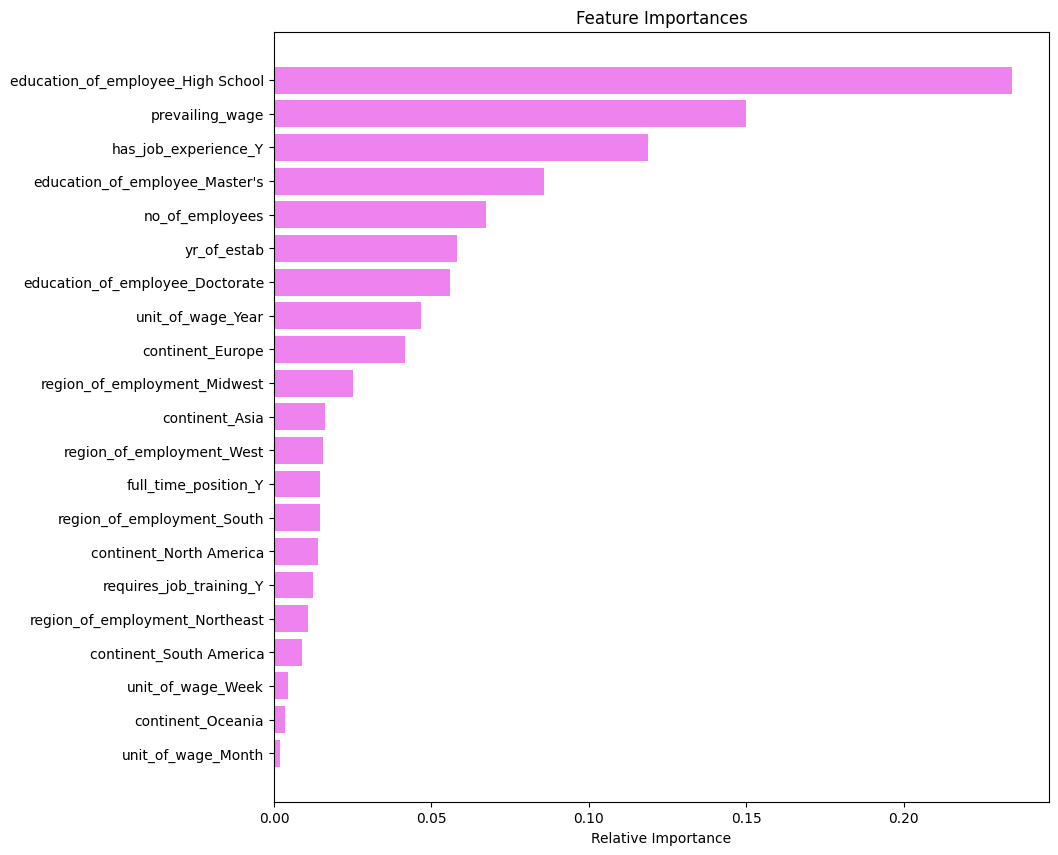

In [163]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The Tuned Random Forest finds these variables as the most important:
1. High School Education only
2. Prevailing Wage
3. Has job experience: Yes
4. Masters Degree

## Boosting- Model building and tuning

###AdaBoost Classifier

In [164]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

**AdaBoost Classifier performance on Training set**

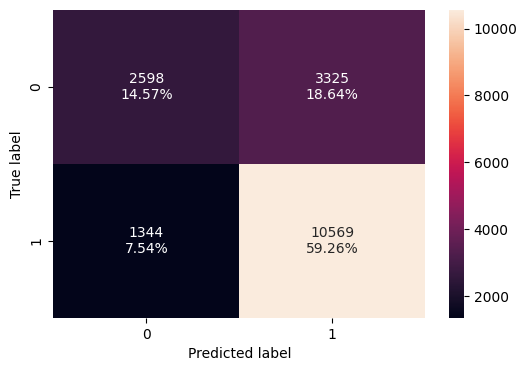

In [165]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [166]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


**AdaBoost Classifier on Test set**

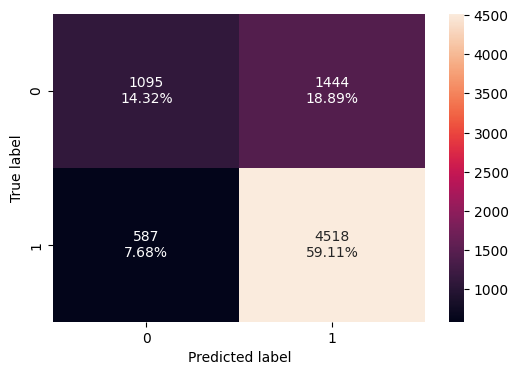

In [167]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [169]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
print("Test performance \n", ab_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


* The training and test sets are performing well.
* The F1-score is slightly lower than in the Tuned Random Forest

###AdaBoost Classifier- Tuned

In [172]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5 )
grid_obj = grid_obj.fit(X_train, y_train)

abc_tuned = grid_obj.best_estimator_

abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

**AdaBoost Tuned Training performance**

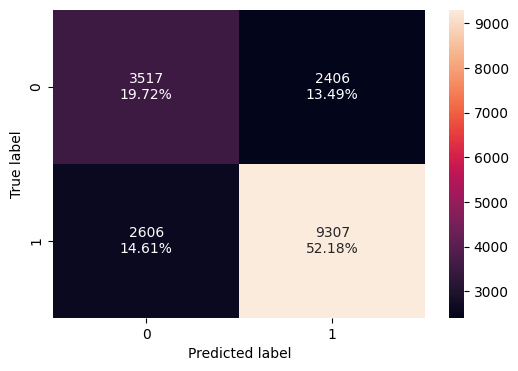

In [173]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [174]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


**AdaBoost Tuned Test performance**

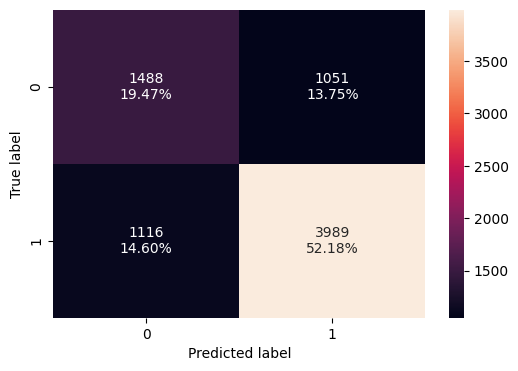

In [175]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [176]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Test performance \n",abc_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


* The Tuned AdaBoost model is performing well, but the F1-score is lower than the AdaBoost, Random Forest, and Tuned Random Forest models.

In [177]:
print(pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
has_job_experience_Y               0.17
education_of_employee_Master's     0.15
education_of_employee_High School  0.14
education_of_employee_Doctorate    0.13
region_of_employment_Midwest       0.11
continent_Europe                   0.10
prevailing_wage                    0.08
region_of_employment_South         0.07
unit_of_wage_Year                  0.04
region_of_employment_West          0.01
unit_of_wage_Week                  0.00
unit_of_wage_Month                 0.00
region_of_employment_Northeast     0.00
no_of_employees                    0.00
requires_job_training_Y            0.00
yr_of_estab                        0.00
continent_South America            0.00
continent_Oceania                  0.00
continent_North America            0.00
continent_Asia                     0.00
full_time_position_Y               0.00


The Tuned AdaBoost model indiciates these are the most important variables:
1. Has job experience: Yes
2. Masters degree
3. High school degree
4. Doctorate degree

###Gradient Boosting Classifier

In [178]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

**Gradient Boosting Classifier Train set performance**

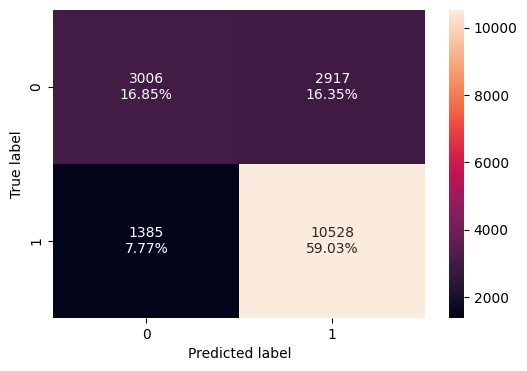

In [179]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [180]:
gb_classifier_model_train_perf = model_performance_classification_sklearn( gb_classifier, X_train, y_train)
print("Training performance \n", gb_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


**Gradient Boostind Classifier Test set performance**

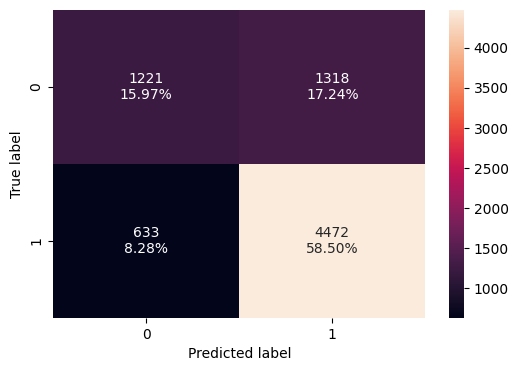

In [181]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [182]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
print("Test performance \n", gb_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


* Gradient Boost Classifier model is giving great performance with an F1-score of 0.8209 which is the best so far.

###Gradient Boosting Tuned

In [183]:
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1)

parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

**Gradient Boost Tuned Training set performance**

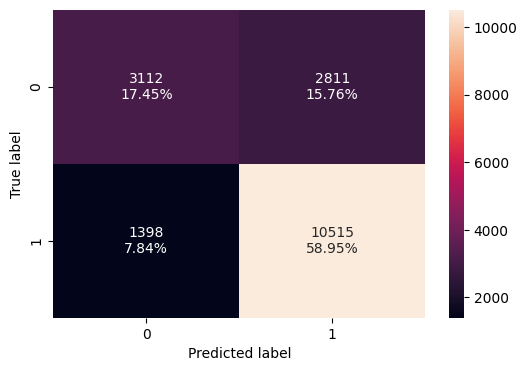

In [184]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [185]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


**Gradient Boost Tuned Test set performance**

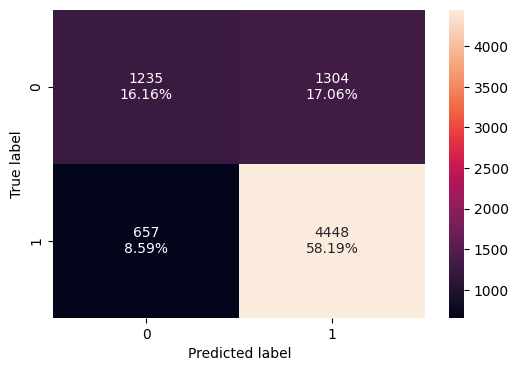

In [186]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [187]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Test performance \n",gbc_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


* The Tuned Gradient Boost model is performing well, the F1-score is lower than in the non-tuned Gradient Boost model

In [188]:
print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.257251
has_job_experience_Y               0.165009
prevailing_wage                    0.145543
education_of_employee_Master's     0.098960
education_of_employee_Doctorate    0.071671
continent_Europe                   0.057128
no_of_employees                    0.034993
region_of_employment_Midwest       0.031480
unit_of_wage_Year                  0.026961
region_of_employment_South         0.023359
yr_of_estab                        0.020976
continent_North America            0.013995
region_of_employment_West          0.010296
continent_Asia                     0.010076
full_time_position_Y               0.009946
continent_South America            0.007628
requires_job_training_Y            0.006981
region_of_employment_Northeast     0.006006
continent_Oceania                  0.001001
unit_of_wage_Week                  0.000447
unit_of_wage_Month                 0.000297


The Tuned Gradient Boost model indiciates these are the most important variables:
1. High School degree Only
2. Has job experience: Yes
3. Prevailing wage
4. Masters degree

###XGBoost Classifier

In [189]:
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

**XGBoost Classifier Training performance**

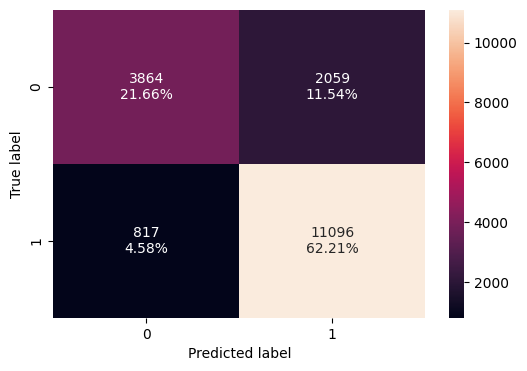

In [190]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [191]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
print("Training performance \n",xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


**XGBoost Classifier Test performance**

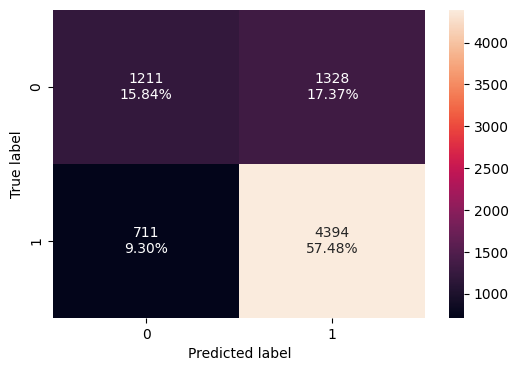

In [192]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [193]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
print("Test performance \n",xgb_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


* The XGBoost model performed well, the test set f1-score is slightly lower than the Tuned gradient boost model test set

###XGBoost Tuned

In [195]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

**XGBoost Tuned Training set performance**

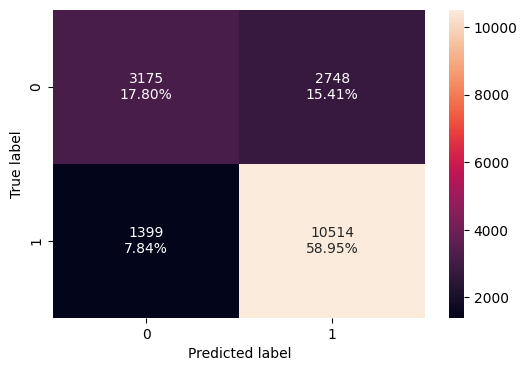

In [196]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [197]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.767493  0.882565   0.792791  0.835273


**XGBoost Tuned Test set performance**

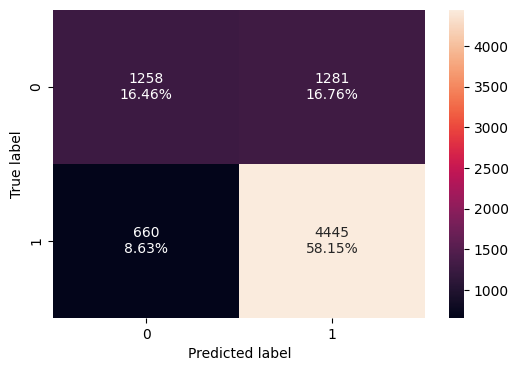

In [198]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [199]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
print("Test performance \n",xgb_tuned_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.746075  0.870715   0.776284  0.820792


The XGBoost model performed good but all test set scores are slightly lower than the Gradient boost classifier

In [200]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.319223
has_job_experience_Y               0.108067
education_of_employee_Doctorate    0.079854
unit_of_wage_Year                  0.078429
education_of_employee_Master's     0.078404
continent_Europe                   0.053595
region_of_employment_Northeast     0.035004
region_of_employment_Midwest       0.031170
region_of_employment_South         0.026812
region_of_employment_West          0.026624
full_time_position_Y               0.023883
continent_Asia                     0.022622
unit_of_wage_Week                  0.020206
prevailing_wage                    0.018898
continent_South America            0.015777
requires_job_training_Y            0.015658
continent_North America            0.015576
continent_Oceania                  0.010446
yr_of_estab                        0.010267
no_of_employees                    0.009488
unit_of_wage_Month                 0.000000


The Tuned XGBoost model top feature importances are:
1. High School education
2. Has job experience: Yes
3. Doctorate degree

## Stacking

In [201]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

**Checking Stacking model Training set performance**

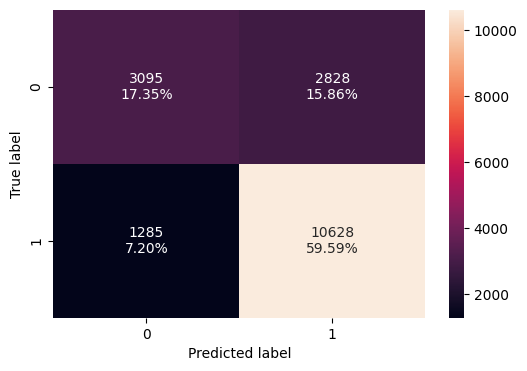

In [202]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [203]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
print("Training performance \n",stacking_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.769399  0.892135   0.789834  0.837873


**Checking Stacking model Test set performance**

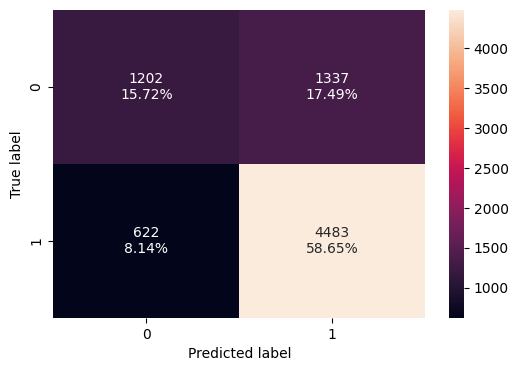

In [204]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [205]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
print("Test performance \n",stacking_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.743721  0.878159   0.770275  0.820686


* The model performed well, but still slightly lower than the Gradient Boosting Classifier model

# Model Performance Comparison and Conclusions

**Training Performance Comparisons**

In [206]:
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.767493,0.769399
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.882565,0.892135
Precision,1.0,0.720067,0.991810,0.994407,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.792791,0.789834
F1,1.0,0.812411,0.988887,0.997154,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.835273,0.837873


**Test Performance Comparisons**

In [207]:
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.727368,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.746075,0.743721
Recall,0.742801,0.930852,0.764153,0.895397,0.847209,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.870715,0.878159
Precision,0.752232,0.715447,0.771711,0.743857,0.768343,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.776284,0.770275
F1,0.747487,0.809058,0.767913,0.812622,0.805851,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820792,0.820686


Observations:
* Several models had high f1-scores on the test set. The Gradient Boost classifer model has the best overall scores on the test set with a very high F1-score. This will be our final model.

###Important Features of Final Model

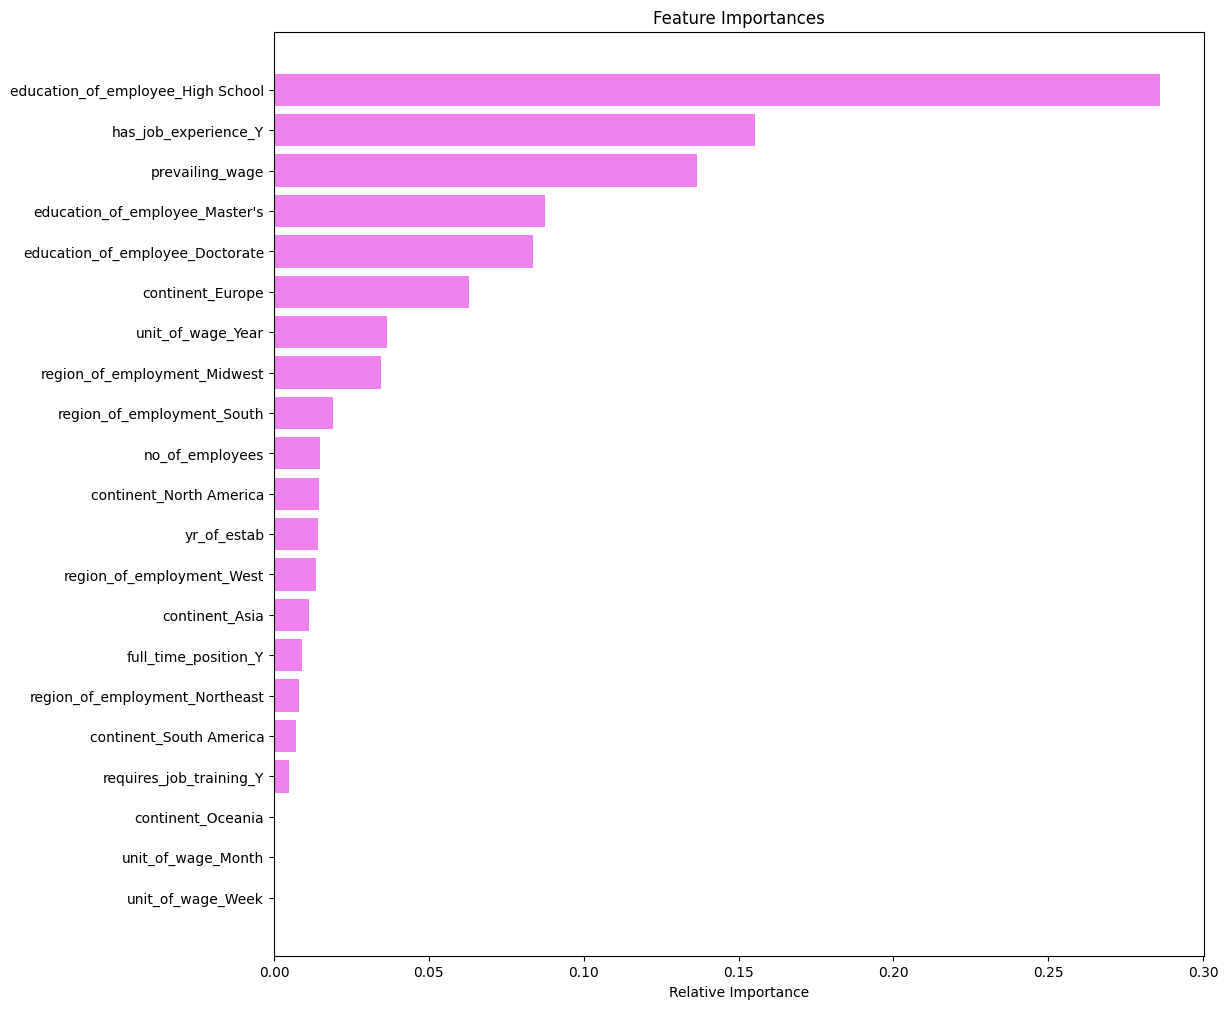

In [208]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
* Our final model shows the most important variables when considering visa applications are:
1. High School degree
2. Has job experience: Yes
3. Prevailing wage
4. Masters degree
5. Doctorate degree

# Actionable Insights and Recommendations

* We can use this predictive model to predict if visa applicants will be Certified or Denied based on variables given.
* The most important variable to look at for considering visa applicants is education. Looking at the education of applicants is an important first step.
 1. Having only a high school degree makes the candidate less likley to be Certified and will likely be Denied.
 2. Having a Doctorate or Masters Degree makes the candidate more likely to be Certified.
* Employers are wanting applicants with job experience, therefore applicants with job experience are more likely to be Certified.
* The company should also look at Prevailing wage when determing applicant Certifiation or Denial.
